<a href="https://colab.research.google.com/github/vikaschaudhary53/cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Classification - Vikas Chaudhary/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

#Data Preperation

In [24]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [25]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [26]:
df.shape

(3390, 17)

In [27]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [28]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [30]:
#Filling 'null'/'nan' values in 'education' column
df['education'].fillna(df['education'].median(), inplace = True)

In [31]:
# Dealing with 'null'/'nan' values in 'BPMeds' column
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [32]:
print(df[df['BPMeds'] == 1.0]['sysBP'].mean())
print(df[df['BPMeds'] == 1.0]['diaBP'].mean())

165.89
96.59


In [33]:
print(df[df['BPMeds'] == 0.0]['sysBP'].mean())
print(df[df['BPMeds'] == 0.0]['diaBP'].mean())

131.47365988909428
82.43838570548367


Dealing with null/nan values in 'BPmeds' columns
1. The systolic pressure above 140 mm Hg is considered as high and above 180 mm Hg is considered as dangerous.
2. The diastolic pressure above 90 mm Hg is considered as high and above 120 mm Hg is considered as dangerous.

So, it is necessary to take medicine above the dangerous limit. But only 100 out of 3346 or 1 out of 33.46 are on medication.

In [34]:
#Filling 'null'/'nan' values in 'BPMeds' column the person with max 'sysBP and max 'diaBP' will be considered on medication while other on no medication
print(df[df['BPMeds'].isna()]['sysBP'].max())
print(df[df['BPMeds'].isna()]['diaBP'].max())

208.0
136.0


In [35]:
df[(df['BPMeds'].isna()) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,NaN,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


All other missing except the person with 'id' = 923 can be put in no medication.

In [36]:
#First filling 'NaN' with '0' later 'id'=923 with 0
df['BPMeds'].fillna(df['BPMeds'].median(), inplace = True)

In [37]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,0.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


Replacing the above 0.0 with 1.0 in 'BPMeds'.

In [38]:
df.loc[df['id']==923, 'BPMeds'] = 1.0

In [39]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,1.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


In [40]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Dealing with 'NaN' values in 'cigsPerDay'

In [41]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,2.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


Since all the candidate are smokers we cann't fill the 'NaN' with 0 we need to give some number

In [42]:
int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean())

18

18 cigarettes/day is the mean (average) for a smoker so we will fill the NaN values with 18

In [43]:
#Filling the 'NaN' value in 'cigsPerDay'
df['cigsPerDay'].fillna(int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean()), inplace=True)

In [44]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Dealing with 'NaN' Vaues in 'totChol' columns

In [45]:
df[df['totChol'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
69,69,65,2.0,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
254,254,52,1.0,F,NO,0.0,0.0,0,0,0,NaN,129.0,83.0,32.57,65.0,NaN,0
290,290,37,2.0,F,YES,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
554,554,38,3.0,F,YES,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
625,625,62,2.0,F,YES,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
700,700,44,2.0,F,YES,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
732,732,61,1.0,F,NO,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
797,797,58,1.0,M,NO,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
808,808,47,2.0,F,YES,20.0,0.0,0,0,0,NaN,121.0,70.0,23.09,80.0,83.0,0


In [46]:
print('Highest Cholesterol:',df['totChol'].max())
print('Lowest Cholesterol:',df['totChol'].min())

Highest Cholesterol: 696.0
Lowest Cholesterol: 107.0


Cholesterol and Stroke are related. So, let's explore the cholesterol level of candidates with 'prevalentStroke' = 1 and 'prevalentStroke' = 0

In [47]:
print('Highest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].max())
print('Lowest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].min())

Highest Cholesterol level among the persons with Prevalent Stroke: 321.0
Lowest Cholesterol level among the persons with Prevalent Stroke: 107.0


Since, the person with the highest cholestrol level i.e. 696 did not has prevalent stroke and with lowest cholestrol level i.e. 107 has prevalent stroke. So, we will replace the 'NaN' values in 'totChol' with 0

In [48]:
#Filling the 'NaN' value in 'totChol'
df['totChol'].fillna(df['totChol'].median(), inplace = True)

In [49]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [50]:
#Filling the 'NaN' values in 'BMI' and 'heartRate'
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)

In [51]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

Now, only 'glucose' has 'NaN' values

Let's explore the 'glucose' column and find the ways to fill the 'NaN' values

In [52]:
df[df['glucose'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,234.0,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,3289,40,2.0,M,YES,10.0,0.0,0,0,0,195.0,110.0,70.0,24.75,79.0,NaN,0
3290,3290,67,1.0,F,NO,0.0,0.0,0,1,0,234.0,173.0,100.0,33.60,60.0,NaN,0
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,3370,46,1.0,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0


We know that blood glucose is directly related to diabetes and we will try to get some relation between 'diabetes' column and 'glucose' column

In [53]:
df[(df['glucose'].isna()) & (df['diabetes'])==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
798,798,47,3.0,M,NO,0.0,0.0,0,0,1,199.0,161.0,102.0,29.17,58.0,NaN,0
1138,1138,50,3.0,F,YES,9.0,0.0,0,0,1,210.0,134.0,80.0,18.26,64.0,NaN,0
1875,1875,47,1.0,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,25.38,86.0,NaN,1


only the above 3 candidates with 'NaN' glucose have diabetes

In [54]:
df[df['diabetes']==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,3164,43,1.0,M,YES,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0,0
3212,3212,60,1.0,F,NO,0.0,0.0,0,1,1,282.0,213.0,94.5,28.58,71.0,78.0,0
3232,3232,50,1.0,F,NO,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3260,3260,43,1.0,F,NO,0.0,0.0,0,1,1,231.0,155.5,99.5,34.95,68.0,274.0,1


Comparing the glucose levels of diabetic or non-diabetic candidates

In [55]:
print('Highest Glucose Level of a Diabetic candidate is:',df[df['diabetes']==1]['glucose'].max())
print('Lowest Glucose Level of a Diabetic candidate is:',df[df['diabetes']==1]['glucose'].min())
print('Highest Glucose Level of a Non-Diabetic candidate is:',df[df['diabetes']==0]['glucose'].max())
print('Lowest Glucose Level of a Non-Diabetic candidate is:',df[df['diabetes']==0]['glucose'].min())

Highest Glucose Level of a Diabetic candidate is: 394.0
Lowest Glucose Level of a Diabetic candidate is: 47.0
Highest Glucose Level of a Non-Diabetic candidate is: 163.0
Lowest Glucose Level of a Non-Diabetic candidate is: 40.0


The 'NaN' values in 'glucose' will be replace in two ways where candidates with diabetes will get higher glucose level while non-diabetic will get lower glucose level.

In [56]:
dia_list = list(df[(df['glucose'].isna()) & (df['diabetes'])==1]['id'])

First filling all 'Nan' values with median and later with higher glucose level for the above 'dia_list' candidates.

In [57]:
df['glucose'].fillna(df['glucose'].median(), inplace = True)

In [58]:
#Again replacing the value of the 3 candidates
for i in dia_list:
  df.loc[df['id']== i, 'glucose'] = df[df['diabetes']==1]['glucose'].median()

In [59]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [60]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [61]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971681,9.127434,0.029794,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.782006,0.150737
std,978.753033,8.592878,1.005925,11.862159,0.170042,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.244717,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


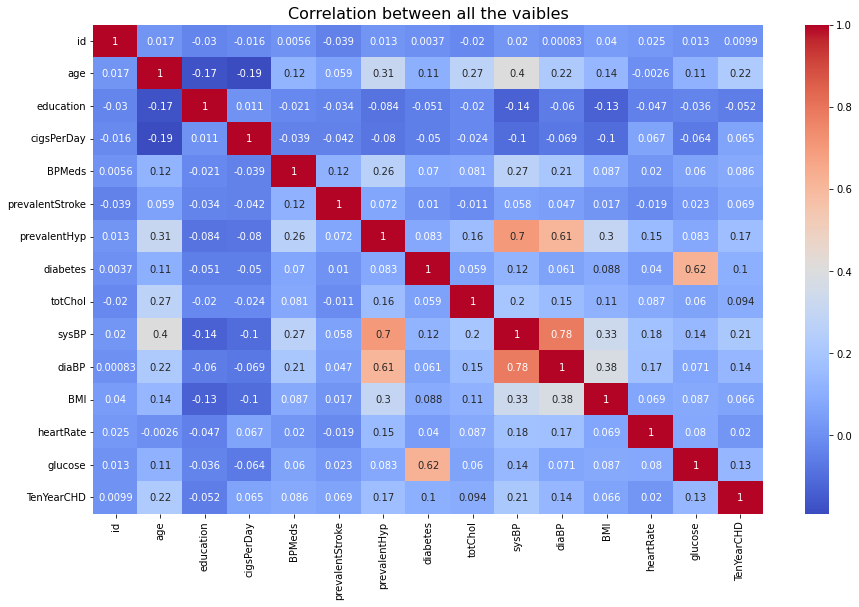

In [62]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [63]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [64]:
#dividing columns into 'numerical' or 'categorical' datatype
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_columns = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

In [65]:
#let's know the range of numrical columns i.e. min and max
print('Minimum Age:', df['age'].min(), '| Maximum Age:',df['age'].max())
print('Least Number of Cigarettes smoked per day:', df['cigsPerDay'].min(), '| Highest Number of Cigarettes smoked per day:',df['cigsPerDay'].max())
print('Minimum Cholesterol:', df['totChol'].min(), '| Maximum Cholesterol:',df['totChol'].max())
print('Minimum Systolic BP:', df['sysBP'].min(), '| Maximum Systolic BP:',df['sysBP'].max())
print('Minimum Diastolic BP:', df['diaBP'].min(), '| Maximum Diastolic BP:',df['diaBP'].max())
print('Minimum BMI Value:', df['BMI'].min(), '| Maximum BMI Value:',df['BMI'].max())
print('Minimum Heart Rate:', df['heartRate'].min(), '| Maximum Heart Rate:',df['heartRate'].max())
print('Minimum Glucose Level:', df['glucose'].min(), '| Maximum Glucose Level:',df['glucose'].max())

Minimum Age: 32 | Maximum Age: 70
Least Number of Cigarettes smoked per day: 0.0 | Highest Number of Cigarettes smoked per day: 70.0
Minimum Cholesterol: 107.0 | Maximum Cholesterol: 696.0
Minimum Systolic BP: 83.5 | Maximum Systolic BP: 295.0
Minimum Diastolic BP: 48.0 | Maximum Diastolic BP: 142.5
Minimum BMI Value: 15.96 | Maximum BMI Value: 56.8
Minimum Heart Rate: 45.0 | Maximum Heart Rate: 143.0
Minimum Glucose Level: 40.0 | Maximum Glucose Level: 394.0


[]

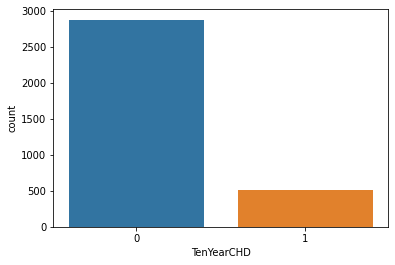

In [66]:
sns.countplot(x=df['TenYearCHD'])
plt.plot()

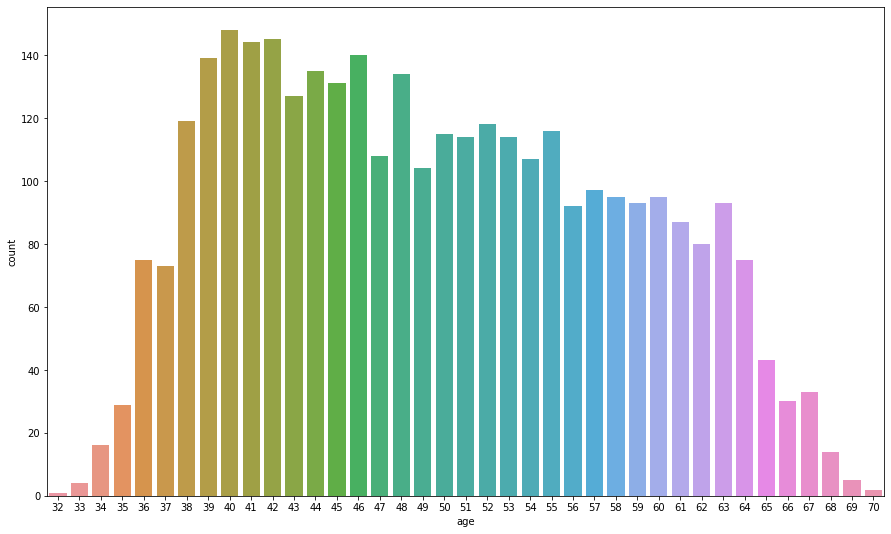

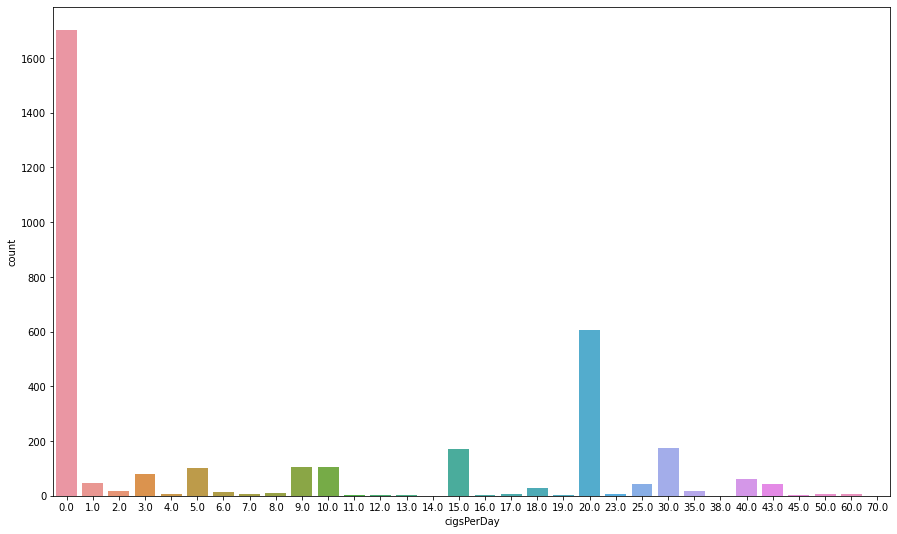

In [67]:
#distplot for numerical features
for val in numerical_columns[:2]:
  plt.figure(figsize=(15,9))
  sns.countplot(x=df[val])
  plt.show()

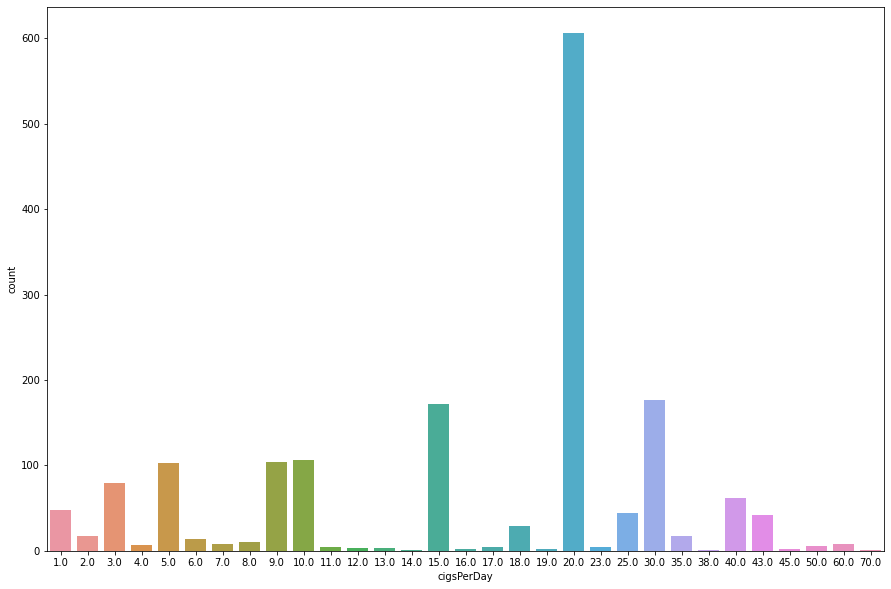

In [68]:
#Make a plot after excluding non-smokers
plt.figure(figsize=(15,10))
sns.countplot(x=df[df['cigsPerDay']!=0.0]['cigsPerDay'])
plt.show()

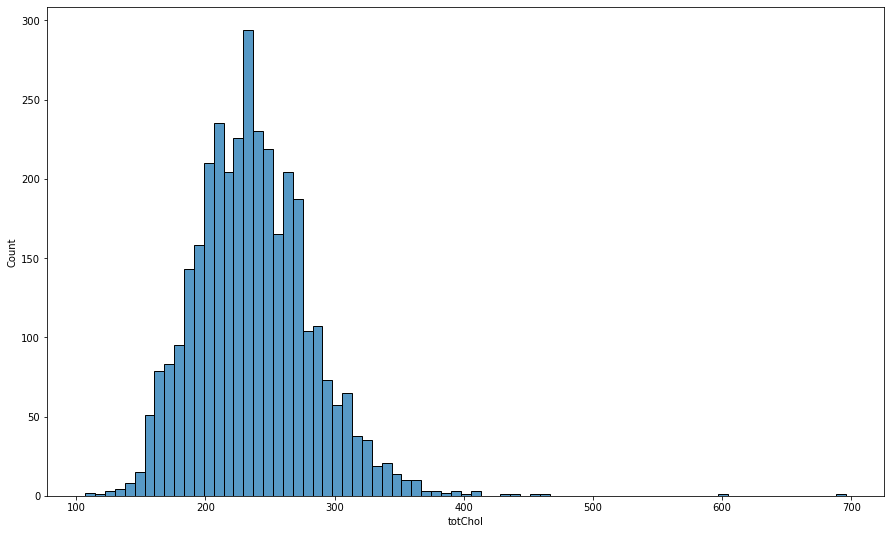

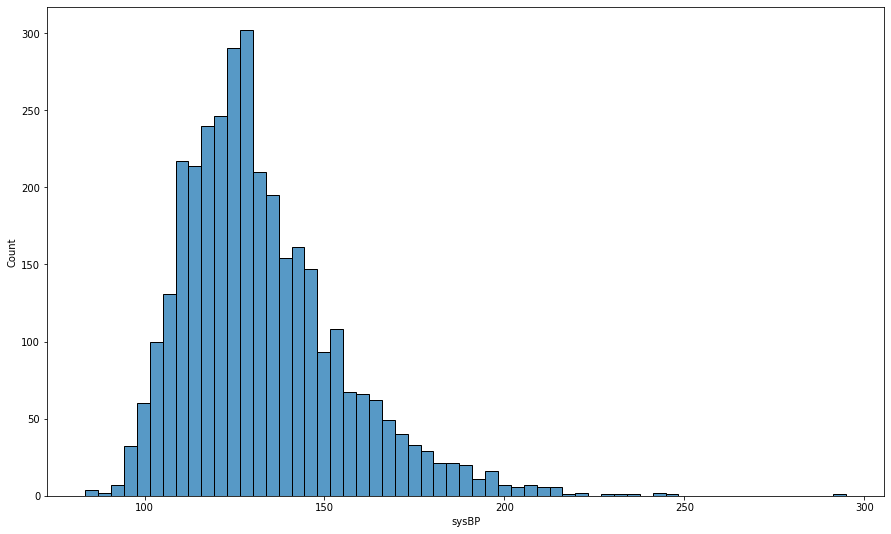

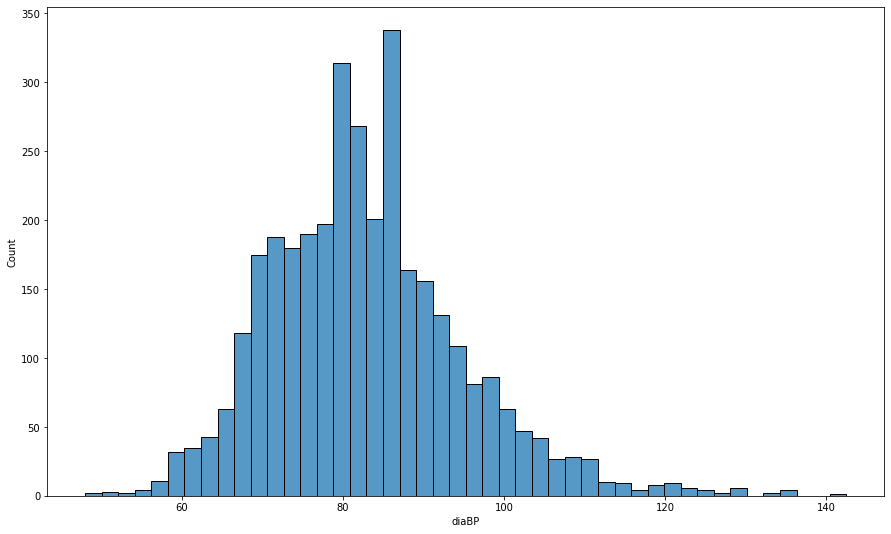

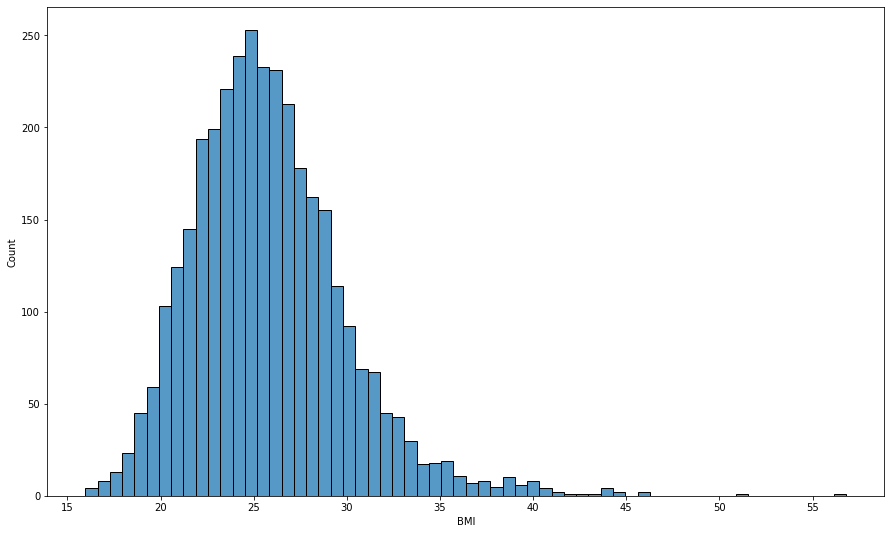

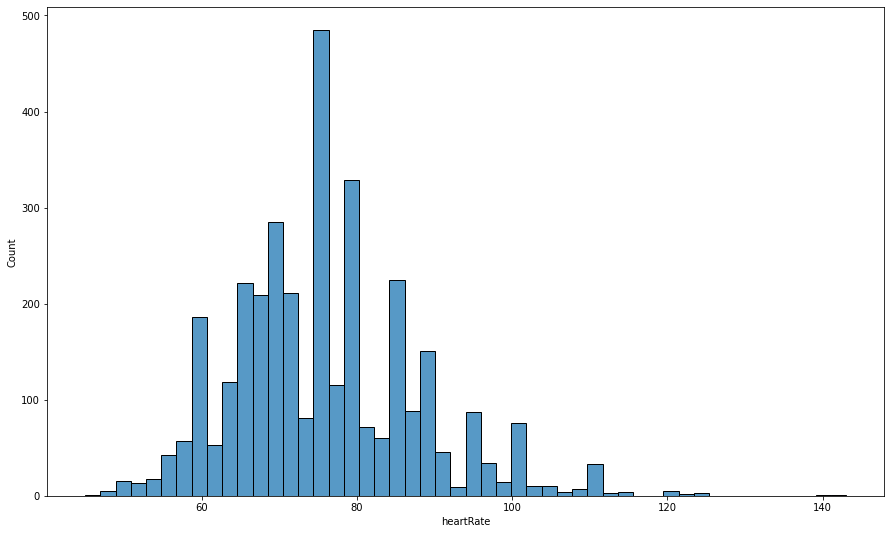

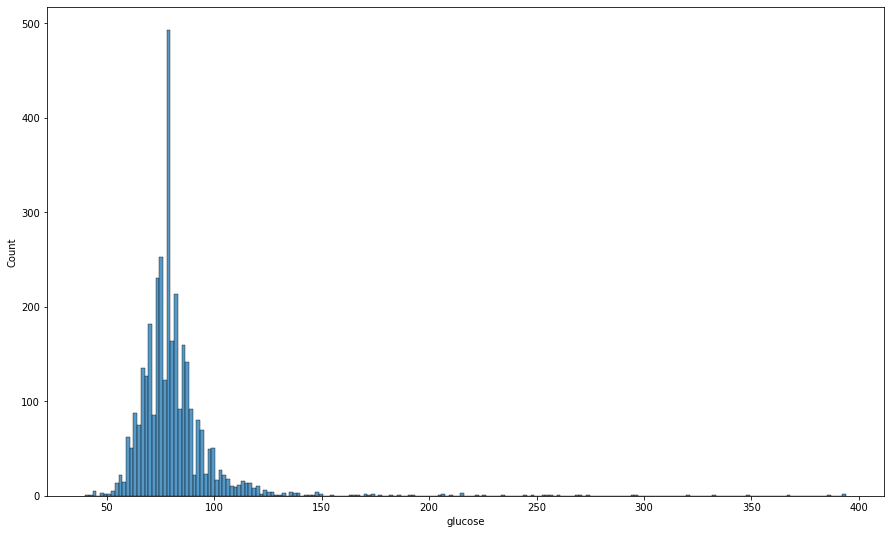

In [69]:
#distplot for numerical features
for val in numerical_columns[2:]:
  plt.figure(figsize=(15,9))
  sns.histplot(x=df[val])
  plt.show()

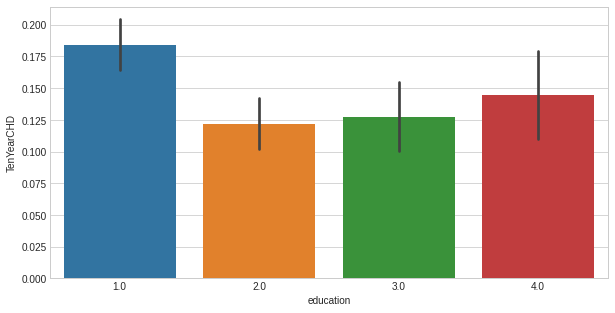

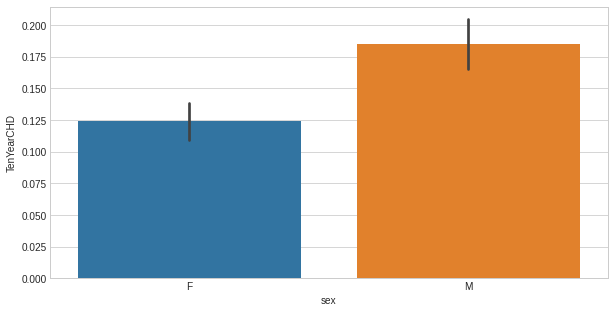

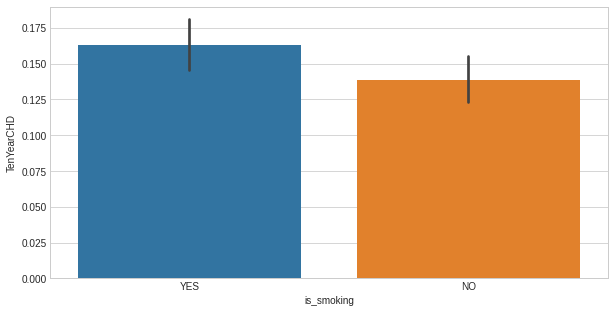

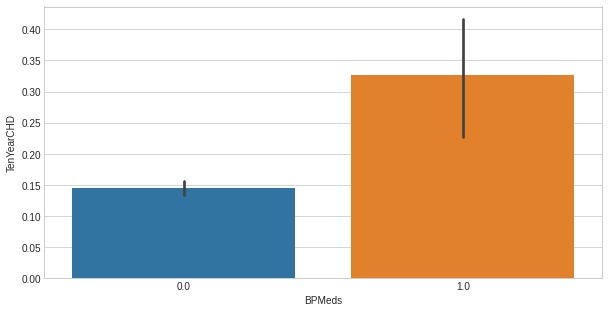

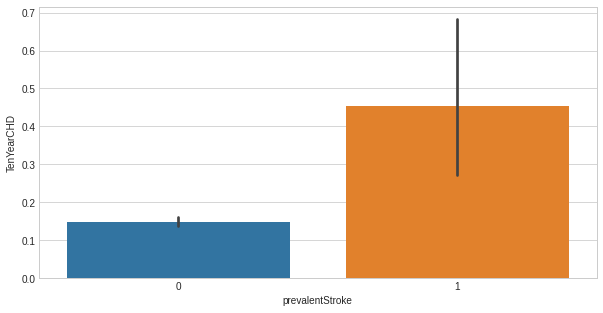

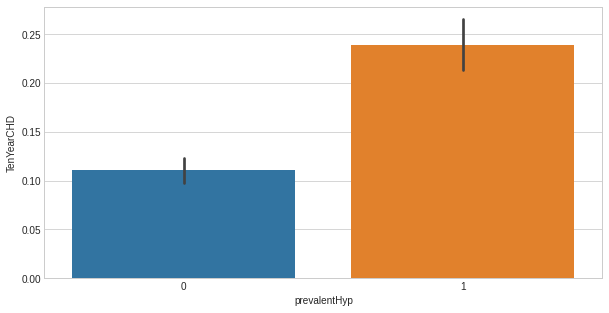

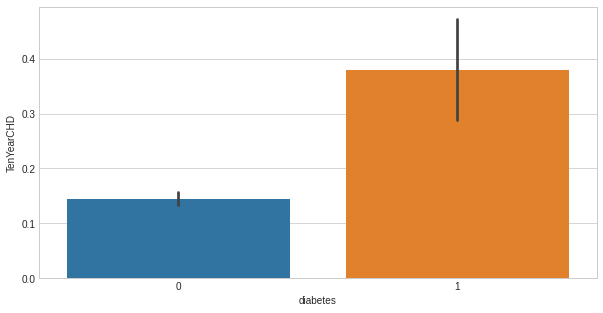

In [70]:
for col in categorical_columns[0:-1]:
  plt.figure(figsize=(10,5))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='TenYearCHD')

###Ploting different graphs to know the cardiovascular disease based in 'Male' and 'Female' category and keeping other conditions same

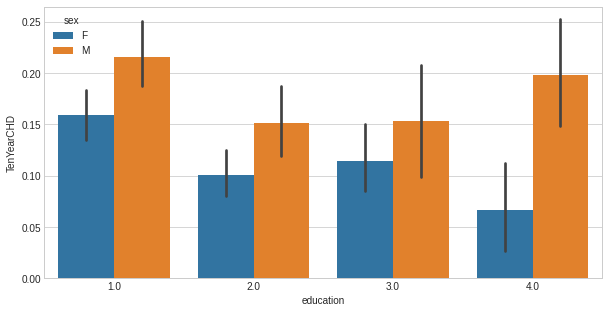

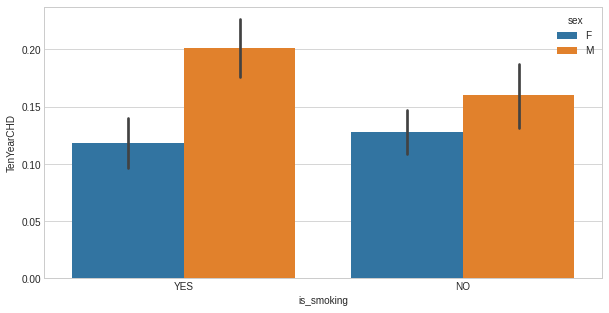

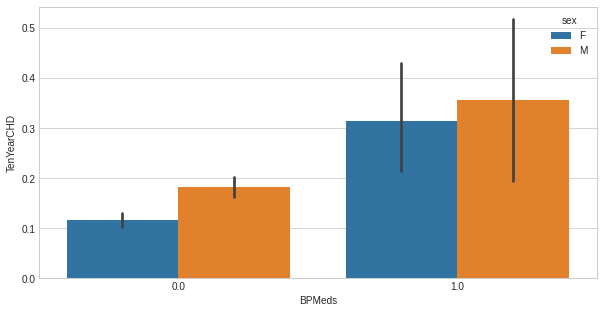

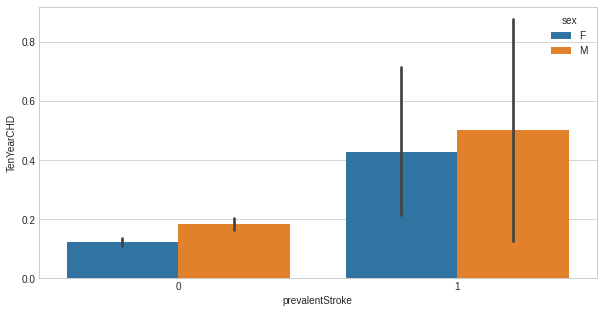

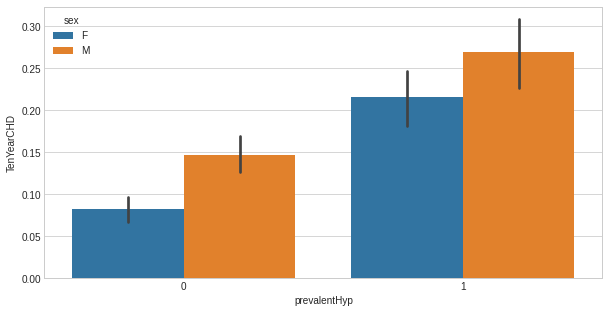

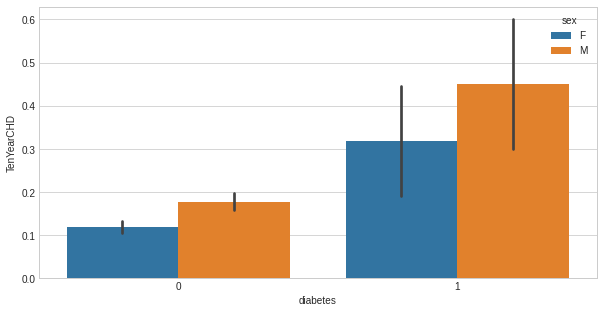

In [71]:
for i in categorical_columns[0:-1]:
  if i!='sex':
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=df,x=i,y='TenYearCHD',hue='sex',ax=ax)

Knowing the percent of smoker at higher cardiovascular risk VS non-smoker

In [72]:
float(len(df[(df['is_smoking']=='YES') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='YES']))

16.301126259632483

In [73]:
len(df[(df['is_smoking']=='NO') & (df['TenYearCHD']==1)])

236

In [74]:
print('There are',len(df[(df['is_smoking']=='YES') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='YES']),'% of smoker who have 10-year risk of coronary heart disease(CHD)')
print('There are',len(df[(df['is_smoking']=='NO') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='NO']),'% of non-smoker who have 10-year risk of coronary heart disease(CHD)')

There are 16.301126259632483 % of smoker who have 10-year risk of coronary heart disease(CHD)
There are 13.857897827363477 % of non-smoker who have 10-year risk of coronary heart disease(CHD)


Difference is less than 3%. So the smoking has a minimum role in causing cardiovascular disorder.

In [75]:
#Let's get a dataset with 'TenYearCHD'=1
risk_df = df[df['TenYearCHD']==1]

In [76]:
risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
15,15,51,1.0,M,YES,15.0,0.0,0,0,0,212.0,146.0,89.0,24.49,100.0,132.0,1
20,20,42,1.0,F,YES,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,78.0,1
3373,3373,58,1.0,F,NO,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1
3374,3374,67,2.0,M,YES,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


Exploring the 'age' column in 'risk_df'

In [77]:
df['age'].value_counts().sort_index()

32      1
33      4
34     16
35     29
36     75
37     73
38    119
39    139
40    148
41    144
42    145
43    127
44    135
45    131
46    140
47    108
48    134
49    104
50    115
51    114
52    118
53    114
54    107
55    116
56     92
57     97
58     95
59     93
60     95
61     87
62     80
63     93
64     75
65     43
66     30
67     33
68     14
69      5
70      2
Name: age, dtype: int64

####Creating a DataFrame based on the age group and cardiovascular risk

In [88]:
a = sum(df['age']<=40)
b = sum((df['age']>40) & (df['age']<=50))
c = sum((df['age']>50) & (df['age']<=60))
d = sum((df['age']>60) & (df['age']<=70))

In [89]:
df_noCHD = df[df['TenYearCHD']==0]
df_yesCDH = df[df['TenYearCHD']==1]

In [90]:
aN = sum(df_noCHD['age']<=40)
bN = sum((df_noCHD['age']>40) & (df_noCHD['age']<=50))
cN = sum((df_noCHD['age']>50) & (df_noCHD['age']<=60))
dN = sum((df_noCHD['age']>60) & (df_noCHD['age']<=70))

In [91]:
aY = sum(df_yesCDH['age']<=40)
bY = sum((df_yesCDH['age']>40) & (df_yesCDH['age']<=50))
cY = sum((df_yesCDH['age']>50) & (df_yesCDH['age']<=60))
dY = sum((df_yesCDH['age']>60) & (df_yesCDH['age']<=70))

In [92]:
#creating an age band to know which age group has the highest risk of attack 
data  = {'age_group':['31-40', '41-50', '51-60', '61-70'], 
         'total_individuals': [a, b, c, d],
         'no_chd_total': [aN, bN, cN, dN],
         'yes_chd_total':[aY, bY, cY, dY],
         'risk_VS_noRisk_ratio':[aY/aN, bY/bN, cY/cN, dY/dN]}
age_df = pd.DataFrame(data)

In [93]:
age_df

,age_group,total_individuals,no_chd_total,yes_chd_total,risk_VS_noRisk_ratio
0,31-40,604,574,30,0.052265
1,41-50,1283,1144,139,0.121503
2,51-60,1041,834,207,0.248201
3,61-70,462,327,135,0.412844


The risk of heart disease is nearly doubling after every 10 years.

In [94]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [95]:

male_df = df[df['sex']=='M']


In [96]:
male_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
13,13,44,1.0,M,YES,40.0,0.0,0,0,0,227.0,146.5,97.0,26.92,80.0,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,3377,37,1.0,M,YES,25.0,0.0,0,0,0,243.0,125.0,75.0,29.19,60.0,78.0,0
3379,3379,39,1.0,M,YES,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,78.0,0
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


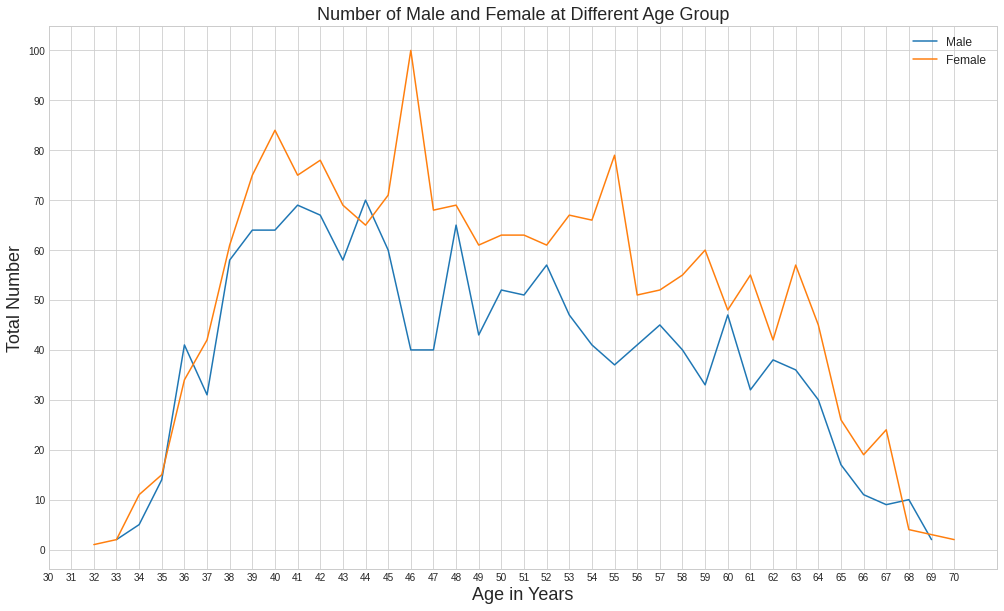

In [98]:
plt.figure(figsize=(17,10))
plt.plot(df[df['sex']=='M']['age'].value_counts().sort_index())
plt.plot(df[df['sex']=='F']['age'].value_counts().sort_index())
plt.legend(['Male','Female'],fontsize=12)
plt.title("Number of Male and Female at Different Age Group",fontsize=18)
plt.xlabel('Age in Years',fontsize=18)
plt.ylabel('Total Number',fontsize=18)
plt.xticks(np.arange(30,71,1))
plt.yticks(np.arange(0,110,10))
plt.show()

###Let's explore 'diabetes' feature.

In [ ]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [133]:
len(df[(df['diabetes']==1) & (df['sex']=='M')]['glucose'].value_counts().sort_index().to_dict().keys())
len(df[(df['diabetes']==1) & (df['sex']=='F')]['glucose'].value_counts().sort_index().to_dict().keys())

44

Text(0, 0.5, 'Glucose Level')

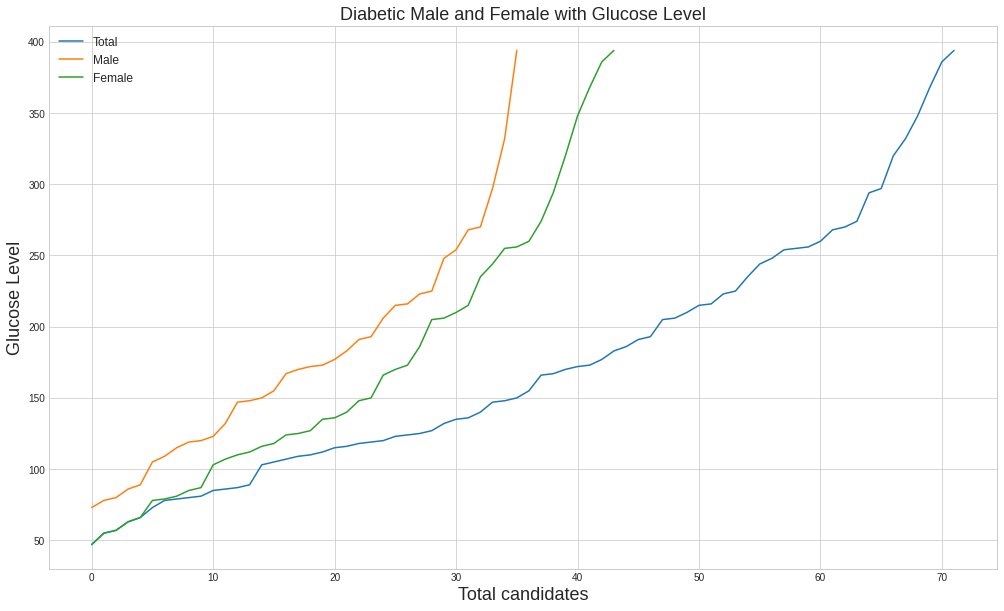

In [142]:
plt.figure(figsize=(17,10))
plt.plot(list(df[df['diabetes']==1]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.plot(list(df[(df['diabetes']==1) & (df['sex']=='M')]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.plot(list(df[(df['diabetes']==1) & (df['sex']=='F')]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.legend(['Total','Male','Female'],fontsize=12)
plt.title("Diabetic Male and Female with Glucose Level",fontsize=18)
plt.xlabel('Total candidates',fontsize=18)
plt.ylabel('Glucose Level',fontsize=18)

Text(0, 0.5, 'Glucose Level')

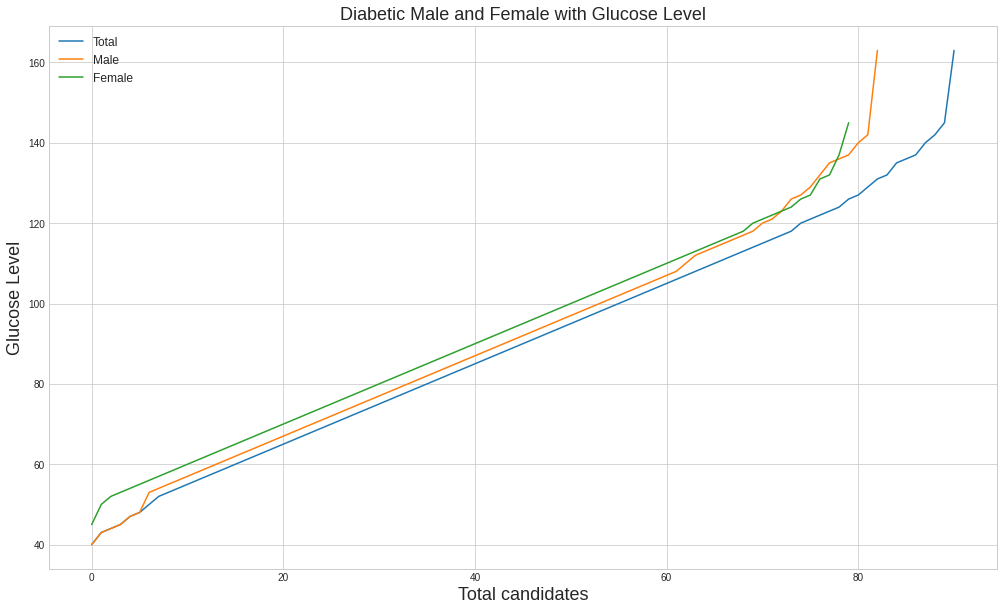

In [143]:
plt.figure(figsize=(17,10))
plt.plot(list(df[df['diabetes']==0]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.plot(list(df[(df['diabetes']==0) & (df['sex']=='M')]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.plot(list(df[(df['diabetes']==0) & (df['sex']=='F')]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.legend(['Total','Male','Female'],fontsize=12)
plt.title("Diabetic Male and Female with Glucose Level",fontsize=18)
plt.xlabel('Total candidates',fontsize=18)
plt.ylabel('Glucose Level',fontsize=18)

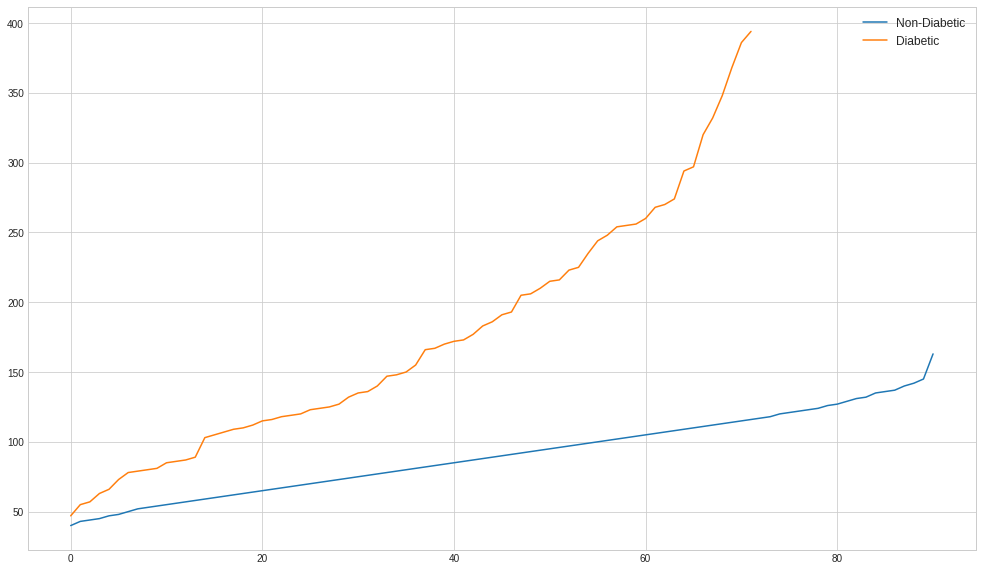

In [145]:
plt.figure(figsize=(17,10))
plt.plot(list(df[df['diabetes']==0]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.plot(list(df[df['diabetes']==1]['glucose'].value_counts().sort_index().to_dict().keys()))
plt.legend(['Non-Diabetic','Diabetic'],fontsize=12)

In [159]:
glucose_age_df.sort_values(by=['age'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [165]:
glucose_age_df

,age,glucose
2642,32,88.0
518,33,74.0
193,33,93.0
440,33,77.0
3027,33,90.0
...,...,...
1070,69,62.0
3175,69,80.0
1098,69,81.0
2231,70,62.0


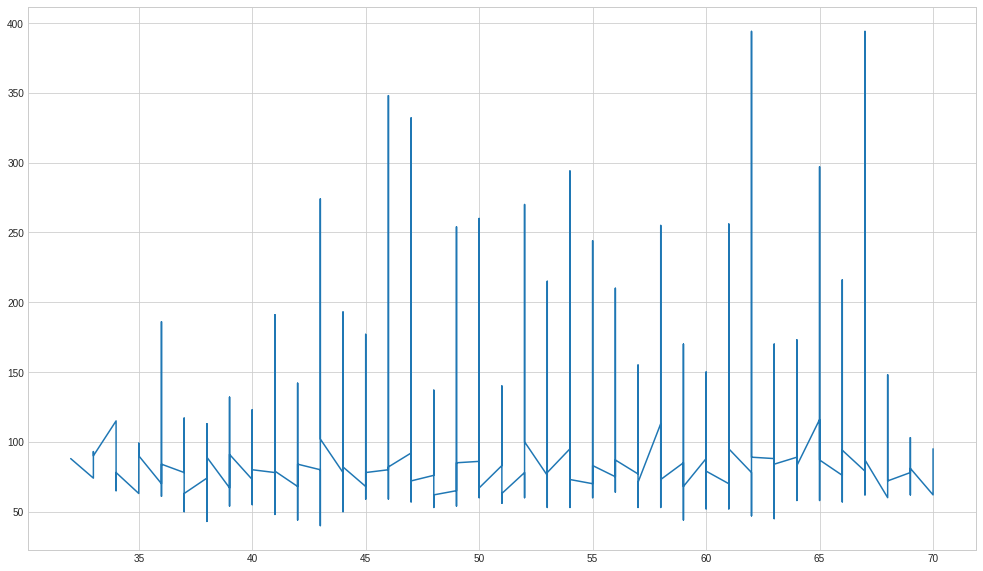

In [164]:
plt.figure(figsize=(17,10))
plt.plot(glucose_age_df['age'], glucose_age_df['glucose'])

In [106]:
df[df['diabetes']==1]['glucose'].value_counts(ascending=False)

148.0    4
120.0    3
116.0    2
80.0     2
215.0    2
        ..
191.0    1
177.0    1
109.0    1
110.0    1
274.0    1
Name: glucose, Length: 72, dtype: int64